In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image

In [2]:
arr = Image.open('./output/mask.png')

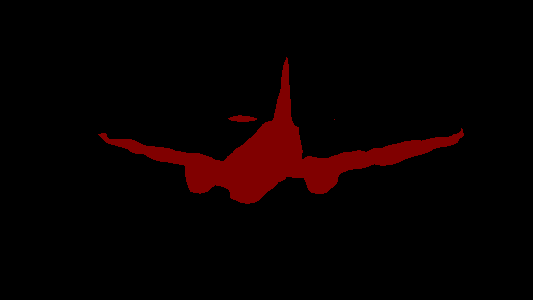

In [3]:
# 3维分割png图像转变为2维png图像
# 原图
arr

In [4]:
# 使用PIL读入图像格式为imagefile
type(arr)

PIL.PngImagePlugin.PngImageFile

In [5]:
# 转化为ndarray，进行图像操作
arr = np.array(arr)

In [6]:
print('shape:' + str(arr.shape))
print('dtype:' + str(arr.dtype))

shape:(300, 533, 3)
dtype:uint8


In [7]:
# print(arr)

In [8]:
dt = np.dtype([('a', arr.dtype), ('b', arr.dtype), ('c', arr.dtype)])

# numpy.squeeze()：从数组的形状中删除单维条目，即把shape中为1的维度去掉
# numpy.view()：视图，（浅复制）即复制arr的数据，https://blog.csdn.net/qq_37553899/article/details/78793226
y = arr.view(dtype=dt).squeeze()
# print(y.shape)    # （300， 533）

In [9]:
'''
unique = 唯一

Python中numpy库unique函数解析

1. 对于一维列表或数组A: 

import numpy as np
A = [1, 2, 2, 3, 4, 3]
a = np.unique(A)
print a            # 输出为 [1 2 3 4]

a, b, c = np.unique(A, return_index=True, return_inverse=True)
print a, b, c      # 输出为 [1 2 3 4], [0 1 3 4], [0 1 1 2 3 2]

2. 对于二维数组(“darray数字类型”): 

A = [[1, 2], [3, 4], [5, 6], [1, 2]]
A = np.array(A)   # 列表类型需转为数组类型
a, b, c = np.unique(A.view(A.dtype.descr * A.shape[1]), return_index=True, return_inverse=True)
print a, b, c     # 输出为 [(1, 2) (3, 4) (5, 6)], [0 1 2], [0 1 2 0]

可以看出, Python中unique函数与Matlab完全一致. 
'''

np.unique(y)

array([(  0, 0, 0), (128, 0, 0)],
      dtype=[('a', 'u1'), ('b', 'u1'), ('c', 'u1')])

In [10]:
label_colours = {(  0,  0,  0) : 0 ,
                # 0=background
                 (128,  0,  0) : 1,
                 (  0,128,  0) : 2,
                 (128,128,  0) : 3,
                 (  0,  0,128) : 4,
                 (128,  0,128) : 5,
                # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
                 (  0,128,128) : 6,
                 (128,128,128) : 7,
                 ( 64,  0,  0) : 8,
                 (192,  0,  0) : 9,
                 ( 64,128,  0) : 10,
                # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
                 (192,128,  0) : 11,
                 ( 64,  0,128) : 12,
                 (192,  0,128) : 13,
                 ( 64,128,128) : 14,
                 (192,128,128) : 15,
                # 11=diningtable, 12=dog, 13=horse, 14=motorbike, 15=person
                 (  0, 64,  0) : 16,
                 (128, 64,  0) : 17,
                 (  0,192,  0) : 18,
                 (128,192,  0) : 19,
                 (  0, 64,128) : 20
                }
                # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor

In [11]:
# 3d to 2d
def convert_from_color_segmentation(arr_3d):
    # 先构造一个全0的2d图像
    arr_2d = np.zeros((arr_3d.shape[0], arr_3d.shape[1]), dtype=np.uint8)

    # 用类别填充2d图像
    for c, i in label_colours.items():
        m = np.all(arr_3d == np.array(c).reshape(1, 1, 3), axis=2)
#         print(m)
#         print(m.shape)    # （300， 533）
        arr_2d[m] = i

    return arr_2d

In [12]:
np.array(Image.fromarray(convert_from_color_segmentation(arr))).shape

(300, 533)

In [13]:
# ndarray 转为图像方便观察
seg = Image.fromarray(convert_from_color_segmentation(arr))

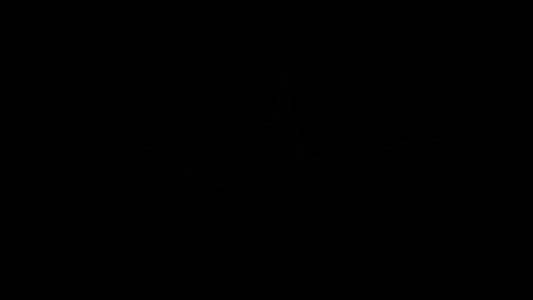

In [14]:
# 转换后的2d图像显示如下
seg

In [15]:
# 逆过程
# 2d恢复为3d rgb图像
# seg = Image.open('./images/2007_000032.png')
type(seg)

PIL.Image.Image

In [16]:
# 图像变数组
seg = np.array(seg)

In [17]:
# 2d to 3d
# def get_keys(d, value):
#     return [k for k,v in d.items() if v == value]

def convert_from_segmentation_color(arr_2d):
    arr_3d = np.zeros( (arr_2d.shape[0], arr_2d.shape[1],3), dtype = np.uint8 )
    
    # 方法一：明显慢
    # 遍历图像像素
#     for i in range(arr_2d.shape[0]):
#         for j in range(arr_2d.shape[1]):
#             # 获取当前类别像素值
#             c = get_keys(label_colours, arr_2d[i][j])
#             # 填充颜色
#             arr_3d[i, j] = np.array(c)
    
    # 方法二：比方法一快
    for c, i in label_colours.items():
        # 3维axis最大=2：二维矩阵，二维axis最大=1：一维向量，axis=0：只有一个值
        # m要获取为二维坐标
        m = np.all(arr_2d.reshape(arr_2d.shape[0], arr_2d.shape[1],1) == i, axis=2)
        arr_3d[m] = np.array(c)
    
    return arr_3d

In [18]:
former = convert_from_segmentation_color(seg)

In [19]:
former.shape

(300, 533, 3)

In [20]:
# print(former)

In [21]:
former = Image.fromarray(former)

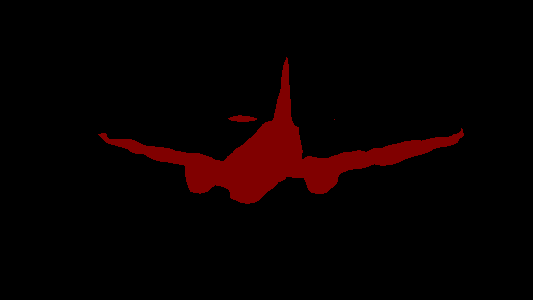

In [22]:
former